# dates

this is how you create dates, and working with them:

In [18]:
import datetime

t1 = datetime.datetime(2016, 7, 30, 17, 15, 23)
print t1

2016-07-30 17:15:23


In [20]:
# you can access different parts of the datetime object conveniently:
print "day: {0}".format(t1.day)
print "hour: {0}".format(t1.hour)
print "year: {0}".format(t1.year)
print "minute: {0}".format(t1.minute)
print "month: {0}".format(t1.month)
print "second: {0}".format(t1.second)

day: 30
hour: 17
year: 2016
minute: 15
month: 7
second: 23


In [6]:
import datetime
t1 = datetime.datetime(2016, 3, 28, 17, 15, 23)
t2 = datetime.datetime(2016, 3, 27, 17, 13, 20)
# time difference between t1 and t2 is 1 day, 2 minutes and 3 seconds
delta = t1-t2

# delta is a special object that saves time differences
print delta

1 day, 0:02:03


In [9]:
# we can access several attributes of it:
print delta.days
print delta.seconds
print delta.total_seconds()

# put attention that total_seconds() == days*(60*60*24) + seconds
print (delta.total_seconds()) == (delta.days*(24*60*60) + delta.seconds)


1
123
86523.0
True


In [12]:
# here is how you create a time delta by yourself:
delta = datetime.timedelta(days = 1, seconds = 23, hours = 4, minutes = 5)
print delta

1 day, 4:05:23


In [14]:
# you can add (or subtract) a time_delta to a date to get another date:
t1 = datetime.datetime(2016, 3, 17, 15, 23, 0)
delta = datetime.timedelta(days = 3, hours = 3, minutes = 4, seconds = 5)
t2 = t1 + delta
print t2

2016-03-20 18:27:05


In [15]:
# another issue with datetimes is how to parse a string to this object, let's have a look:

In [25]:
date_str = "23/05/2019 18:45"
# first we need to tell the date-time object what is the format of the string_str (what part of it is minutes, hours and etc..):
format_str = "%d/%m/%Y %H:%M"
parsed_date = datetime.datetime.strptime(date_str, format_str)

print parsed_date



2019-05-23 18:45:00


In [33]:
# another try:
date_str = "05-23-94 18:23:12"
format_str = "%m-%d-%y %H:%M:%S"
parsed_date = datetime.datetime.strptime(date_str, format_str)
print parsed_date

1994-05-23 18:23:12


# matplotlib

this is a very very short introduction to how plotting graphs in matplotlib

In [38]:
# first import matplotlib:
import matplotlib.pyplot as plt
# create x and y that we will plot with:
x = range(-9,10)
y = [val*val for val in x]

# create an empty figure to plot on:
plt.figure()
plt.plot(x, y)
plt.show()

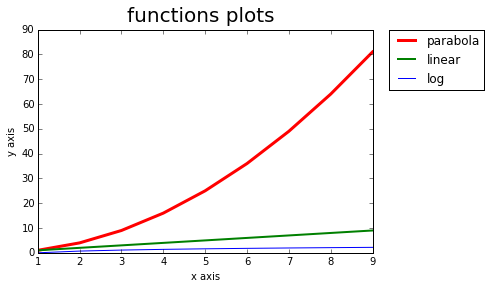

In [43]:
# now, lets enrich the graph a little bit:
# first import matplotlib:
import math
import matplotlib.pyplot as plt
%matplotlib inline   
# draw plots inline notebook

# create x and y that we will plot with:
x = range(1,10)
y1 = [val*val for val in x]
y2 = x
y3 = [math.log(val) for val in x]

# create an empty figure to plot on:
fig = plt.figure()
fig.suptitle('functions plots', fontsize=20)
plt.plot(x, y1, label="parabola", color='red', linewidth=3)
plt.plot(x, y2, label="linear", color='green', linewidth=2)
plt.plot(x, y3, label='log', color='blue', linewidth=1)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# pandas

# # creating data frames:

pandas is a very convenient library to handles with tables. lets learn how to work with it.
the table data structure in spark is called dateframe. there are 2 common ways to create dataframe by yourself:


In [46]:
import pandas as pd
names = ['yoav', 'lital', 'yaniv']
ages = [25, 30, 46]
degrees= ['msc' , 'bsc', 'phd']

df = pd.DataFrame({"name":names, "age":ages, "degrees":degrees})
print df

   age degrees   name
0   25     msc   yoav
1   30     bsc  lital
2   46     phd  yaniv


put attention to the left column added. it is the index of the data frame and it holds the keys for accessing the rows in
the dataframe. it is recomended to create a customary index for each dataframe. you can change the index in the following way:

In [62]:
df.index = ['a', 'b', 'c']
df

,age,degrees,name
a,25,msc,yoav
b,30,bsc,lital
c,46,phd,yaniv


or by declaring it while it is created:

In [61]:
import pandas as pd
names = ['yoav', 'lital', 'yaniv']
ages = [25, 30, 46]
degrees= ['msc' , 'bsc', 'phd']

df = pd.DataFrame({"name":names, "age":ages, "degrees":degrees}, index = ['a', 'b', 'c'])
df

,age,degrees,name
a,25,msc,yoav
b,30,bsc,lital
c,46,phd,yaniv


In [60]:
#o.k, so we saw one way to create dataframes: dictionary of lists (each list is a column of the dataframe).
#another way is by list of dictionary, while each dictionary represents a row in the dataframe:

row1 = {"name": 'yoav', "age": 25, 'degree': 'msc'}
row2 = {"name": 'lital', 'age': 30, 'degree': 'bsc'}
row3 = {'name': 'yaniv', 'age': 46, 'degree': 'phd'}

df = pd.DataFrame([row1, row2, row3], index = ['a', 'b', 'c'])
df

,age,degree,name
a,25,msc,yoav
b,30,bsc,lital
c,46,phd,yaniv


In [ ]:
# very important tasks are to read from csv and write to csv, this is easily done by the following orders:
# df.to_csv("output_path")
# df = pd.read_csv("inupt_path")

# # accessing data frames:

pandas provides very convenient ways to access its elements.


access columns by its name:

In [63]:
df['name']

a     yoav
b    lital
c    yaniv
Name: name, dtype: object

put attention that the columns datatime is 'series' which internally implemented based on numpy arrays.
in order to work with is as a list you should do a conversion:

In [53]:
print type(df['name'])
print type(df['name'].values)
print type(list(df['name']))

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>
<type 'list'>


and what about accessing by rows?
you can access by the index of the row in the following way:

In [64]:
df.loc['b']

age           30
degrees      bsc
name       lital
Name: b, dtype: object

In [65]:
df.loc['b']['age']

30

In [57]:
# or by accessing the i'th element in the df:

In [66]:
df.iloc[0]


age          25
degrees     msc
name       yoav
Name: a, dtype: object

there is a very convenient boolean indexing too:

In [67]:
bool_arr = [True, False, True]
df[bool_arr]

,age,degrees,name
a,25,msc,yoav
c,46,phd,yaniv


this can be used in order to select rows by boolean conditions on their values:

In [68]:
filtered_df = df[df['age'] < 40]
filtered_df

,age,degrees,name
a,25,msc,yoav
b,30,bsc,lital


and it could be done with multiple conditions too:

In [81]:
filtered_df = df[(df['age'] < 40) & (df['degrees'].isin(['msc', 'phd']))]
filtered_df

,age,degrees,name
a,25,msc,yoav


you can access the columns names of the dataframe and its index simply by:

In [83]:
print "df_columns: {0}".format(filtered_df.columns)
print "df_index: {0}".format(filtered_df.index)

df_columns: Index([u'age', u'degrees', u'name'], dtype='object')
df_index: Index([u'a'], dtype='object')


# changing data frame (add content, remove content, joins)

adding column to a dataframe is easy:

In [86]:
df['salary'] = [100,200,300]
df

,age,degrees,name,salary
a,25,msc,yoav,100
b,30,bsc,lital,200
c,46,phd,yaniv,300


if you know the mapping between salary and index of the df it is recomended to add columns add a series:

In [91]:
df['salary'] = pd.Series([200, 100, 300], index=['b', 'a', 'c'])
df

,age,degrees,name,salary
a,25,msc,yoav,100
b,30,bsc,lital,200
c,46,phd,yaniv,300


you can make arithmetic operation between dataframe columns:

In [92]:
print df['salary'] + df['age']

a    125
b    230
c    346
dtype: int64


removing a columns is just as easy:

In [93]:
del df['salary']
df

,age,degrees,name
a,25,msc,yoav
b,30,bsc,lital
c,46,phd,yaniv


arithmetic with data frame columns is easy:

In [94]:
print df['age']+5

a    30
b    35
c    51
Name: age, dtype: int64


how to make a union between several dataframes?

In [105]:
df1 = df.loc[['a','b']]
df2 = pd.DataFrame(dict(df.loc['c']), index= ['c'])
print "df1:\r\n"
print df1
print "\r\ndf2:\r\n"
print df2
print "\r\nconcatenation:\r\n"
print pd.concat([df1,df2])

df1:

   age degrees   name
a   25     msc   yoav
b   30     bsc  lital

df2:

   age degrees   name
c   46     phd  yaniv

concatenation:

   age degrees   name
a   25     msc   yoav
b   30     bsc  lital
c   46     phd  yaniv


and here is how we join between several dataframes:

In [106]:
other_df = pd.DataFrame({'salary': [5000, 8000], 'city': ['jerusalem', 'tel aviv']}, index = ['b', 'c'])
other_df = df.join(other_df)
print other_df

   age degrees   name       city  salary
a   25     msc   yoav        NaN     NaN
b   30     bsc  lital  jerusalem    5000
c   46     phd  yaniv   tel aviv    8000


# efficient access and iteration:

iterating through df rows with loc/iloc is extremely inefficient.
lets demonstate this:

In [111]:
df = pd.DataFrame({'x': range(1000), 'y': range(10, 1010)})

instead accessing rows like this:
for i in range(1000):
    print df.iloc[i]
or like this:
for i in df.index:
     print df.loc[i]
    
it is recommended to access in one of the following ways which are much faster:
1.
col1 = list(df['x'])
col2 = list(df['y'])
index_col = list(df.index)
for i in index_col:
    col1_value = col1[i]
    col2_value = col2[i]
    

and the other option is:

In [125]:
for tup in df.itertuples():
    temp = tup

print temp # first value = index, second = first_column, last = last_columns

(999, 999, 1009)


# grouping and sorting

sorting is easy:

In [128]:
df.sort(['age'])

KeyError: 'age'

In [145]:
import pandas as pd
names = ['yoav', 'lital', 'yaniv']
ages = [25, 30, 46]
degrees= ['msc' , 'bsc', 'phd']

df = pd.DataFrame({"name":names, "age":ages, "degrees":degrees}, index = ['a', 'b', 'c'])

df = df.sort(['age'], ascending=False)
df

,age,degrees,name
c,46,phd,yaniv
b,30,bsc,lital
a,25,msc,yoav


In [130]:
# what if we want to sort by two columns - primary and secondary:

In [146]:
df['kids'] = [3, 1, 3]
df

,age,degrees,name,kids
c,46,phd,yaniv,3
b,30,bsc,lital,1
a,25,msc,yoav,3


In [147]:
df = df.sort(['kids', 'age'], ascending=[False, True])
df

,age,degrees,name,kids
a,25,msc,yoav,3
c,46,phd,yaniv,3
b,30,bsc,lital,1


grouping is very import object too: lets groupby number of kidfs:

In [149]:
grouped_df = df.groupby(['kids'])
print grouped_df.groups

{1: ['b'], 3: ['a', 'c']}


In [156]:
# in order to iterate:
for k in grouped_df.groups:
    print 'group: {0}'.format(k)
    print 'group indices: {0}'.format(grouped_df.groups[k])

group: 1
group indices: ['b']
group: 3
group indices: ['a', 'c']


In [157]:
# you can do aggregations too:

In [158]:
df.groupby(["kids"]).mean()

,age
kids,
1,30.0
3,35.5


# scikit learn:

here is a simple pipeline for learning a model:

first lets create our data:

In [165]:
import random
x1 = [random.random() for i in range(1000)]
x2 = [random.random() for i in range(1000)]
x3 = [random.random() for i in range(1000)]
y = [(x1[i] > 0.5) and (x2[i] < 0.75) and (x3[i] > 0.33) for i in range(1000)]
# first 700 examples for train and last 300 to test:
train_df = pd.DataFrame({"x1":x1[:700], "x2":x2[:700], "x3": x3[:700]})
train_labels = pd.Series(y[:700])
test_df = pd.DataFrame({"x1":x1[700:], "x2":x2[700:], "x3": x3[700:]})
test_labels = pd.Series(y[700:])

print "train head:\r\n"
print train_df.head(3)
print "train_labels:"
print train_labels.head(3)

print "test head:"
print test_df.head(3)
print "test labels:"
print test_labels.head(3)

train head:

         x1        x2        x3
0  0.015743  0.140384  0.532056
1  0.688645  0.674805  0.644086
2  0.790255  0.300649  0.128451
train_labels:
0    False
1     True
2    False
dtype: bool
test head:
         x1        x2        x3
0  0.894625  0.928334  0.979942
1  0.068290  0.038304  0.849449
2  0.890235  0.324168  0.479024
test labels:
0    False
1    False
2     True
dtype: bool


o.k, lets learn a random forest model from the train:

In [167]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=1000, oob_score=True)
random_clf = random_clf.fit(train_df, train_labels)



o.k. up to here we learned a model, now lets evaluate it:

In [168]:
# lets start with the out of bag error:
print random_clf.oob_score_

0.991428571429


In [170]:
# very good validation error!
# lets predict with the classifier on the test and see if the validation error is really close to the test error:
predictions = random_clf.predict(test_df)

<type 'numpy.ndarray'>


and now lets compute the test error:

In [172]:
errors_counter = 0
test_labels_list = list(test_labels)
for i in range(len(predictions)):
    if predictions[i] != test_labels[i]:
        errors_counter += 1
print "test_error: {0}".format(1-float(errors_counter)/len(predictions))
    

test_error: 0.996666666667


very nice! and what if we want to draw the roc curve and compute the auc on the validation and test?
no problem:

lets start on the validation:

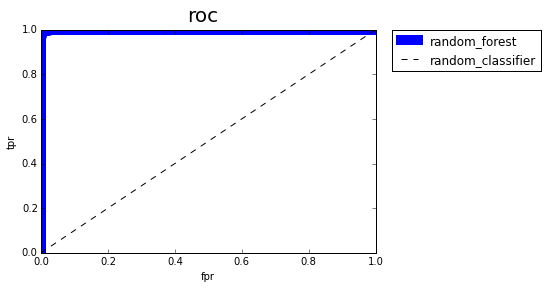

auc: 0.999812069556


In [181]:
from sklearn.metrics import roc_curve, auc
validations_scores = [tup[1] for tup in random_clf.oob_decision_function_]
fpr, tpr, thresholds = roc_curve(list(train_labels), validations_scores, pos_label = True)
# lets compute auc:
auc = auc(fpr, tpr)

# now lets draw the roc graph:
fig = plt.figure()
fig.suptitle('roc', fontsize=20)
plt.plot(fpr, tpr, color = "blue", linewidth=10, label = 'random_forest')
plt.plot([0, 1], [0, 1], 'k--', label = 'random_classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

print 'auc: {0}'.format(auc)

very good, now lets do the same on the test set:

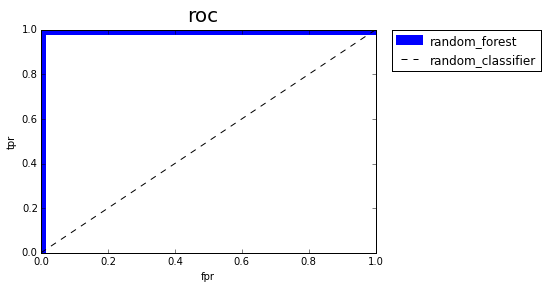

auc: 1.0


In [182]:
from sklearn.metrics import roc_curve, auc
test_scores = [tup[1] for tup in random_clf.predict_proba(test_df)]
fpr, tpr, thresholds = roc_curve(list(test_labels), test_scores, pos_label = True)
# lets compute auc:
auc = auc(fpr, tpr)

# now lets draw the roc graph:
fig = plt.figure()
fig.suptitle('roc', fontsize=20)
plt.plot(fpr, tpr, color = "blue", linewidth=10, label = 'random_forest')
plt.plot([0, 1], [0, 1], 'k--', label = 'random_classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

print 'auc: {0}'.format(auc)

well done! 
that is folks, you are now ready to do some data science by yourself.
have fun!